 # Analyzing CIA Factbook Data Using SQLite and Python

In [1]:
import sqlite3
import pandas as pd

In [13]:
conn = sqlite3.connect("factbook.db")

#q_tables = "SELECT * FROM sqlite_master WHERE type='table'"
#pd.read_sql_query(q_tables, conn)

# The above shows the table name is 'facts'
q = "SELECT * FROM facts"
df = pd.read_sql_query(q, conn)

## Exploratory Data Analysis
A little bit of EDA now:

In [18]:
df.head()

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230.0,652230.0,0.0,32564342.0,2.32,38.57,13.89,1.51
1,2,al,Albania,28748.0,27398.0,1350.0,3029278.0,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741.0,2381741.0,0.0,39542166.0,1.84,23.67,4.31,0.92
3,4,an,Andorra,468.0,468.0,0.0,85580.0,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700.0,1246700.0,0.0,19625353.0,2.78,38.78,11.49,0.46


Same but with SQL:

In [29]:
q = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [19]:
print("Shape: {}".format(df.shape))

Shape: (261, 11)


In [28]:
print(df.dtypes)

id                     int64
code                  object
name                  object
area                 float64
area_land            float64
area_water           float64
population           float64
population_growth    float64
birth_rate           float64
death_rate           float64
migration_rate       float64
dtype: object


In [30]:
df.describe()

,id,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
count,261.00000,2.490000e+02,2.460000e+02,243.000000,2.420000e+02,236.000000,228.000000,228.000000,223.000000
mean,131.00000,5.550935e+05,5.227026e+05,19067.592593,6.209493e+07,1.200975,19.328553,7.821272,3.433946
std,75.48841,1.737041e+06,1.654027e+06,89559.192992,4.816938e+08,0.901470,9.465795,2.878720,4.406689
min,1.00000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,6.650000,1.530000,0.000000
25%,66.00000,7.600000e+02,7.532500e+02,0.000000,2.991022e+05,0.427500,11.587500,5.917500,0.355000
50%,131.00000,5.678500e+04,5.900950e+04,440.000000,5.219556e+06,1.050000,16.555000,7.525000,1.910000
75%,196.00000,3.420000e+05,3.259935e+05,6555.000000,1.873804e+07,1.875000,24.380000,9.435000,4.945000
max,261.00000,1.709824e+07,1.637774e+07,891163.000000,7.256490e+09,4.020000,45.450000,14.890000,22.390000


Let's use both Pandas and SQL to answer:
    - The minimum population
    - The maximum population
    - The minimum population growth
    - The maximum population growth

In [32]:
print(df['population'].min())
print(df['population'].max())
print(df['population_growth'].min())
print(df['population_growth'].max())


0.0
7256490011.0
0.0
4.02


Now with SQL:

In [37]:
q = "SELECT MIN(population) FROM facts"
pd.read_sql_query(q,conn)

,MIN(population)
0,0


In [38]:
q = "SELECT MAX(population) FROM facts"
pd.read_sql_query(q,conn)

,MAX(population)
0,7256490011


In [39]:
q = "SELECT MIN(population_growth) FROM facts"
pd.read_sql_query(q,conn)

,MIN(population_growth)
0,0.0


In [40]:
q = "SELECT MAX(population_growth) FROM facts"
pd.read_sql_query(q,conn)

,MAX(population_growth)
0,4.02


In [41]:
q = "SELECT Name, MIN(population) FROM facts"
pd.read_sql_query(q,conn)

,name,MIN(population)
0,Antarctica,0


In [43]:
q = "SELECT Name, MAX(population) FROM facts"
pd.read_sql_query(q,conn)

,name,MAX(population)
0,World,7256490011


The country with population zero is Antarctica, while 'World' is listed in the table and 7.2 bln is the population of the world at the time the dataset was made.

Let's make a new df without Antarctica or the World as separate rows:

In [ ]:
df2 = df.loc[ (df['name']!='Antarctica') & (df['name']!='World') ,:]

Now let's do a little bit of plotting with matplotlib

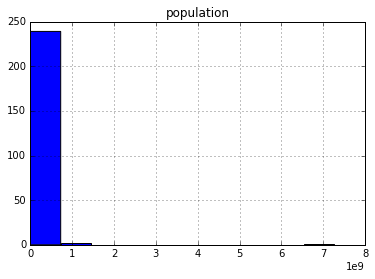

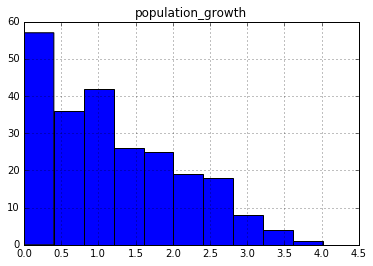

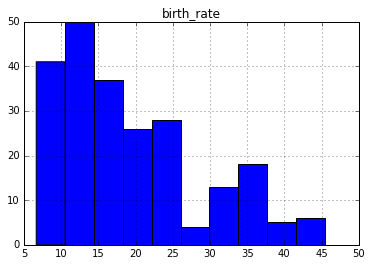

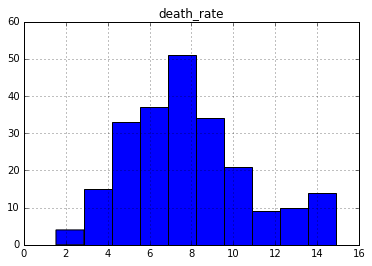

In [68]:
import matplotlib.pyplot as plt
%matplotlib inline

#fig = plt.figure(figsize=(10,10))
cols = ['population', 'population_growth', 'birth_rate', 'death_rate']
for i,c in enumerate(cols):
    _ = df.hist(c)
    

A few more questions:
    - Which countries have the highest population density?
    - Generate a histogram of population densities.
    - Which countries have the highest ratios of water to land? Which countries have more water than land?


In [88]:
pd.options.mode.chained_assignment = None  # default='warn'
df2['pop_density'] = df['population'] / df['area']
df2[['name', 'pop_density']].sort_values(
    by='pop_density', ascending=False).head()

,name,pop_density
189,Holy See (Vatican City),inf
204,Macau,2.116896e+04
116,Monaco,1.526750e+04
155,Singapore,8.141280e+03
203,Hong Kong,6.445042e+03


Get rid of the Vatican as it is a special case:

In [96]:
with pd.option_context('mode.use_inf_as_null', True):
   df = df.dropna()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6d12c7320>]],
      dtype=object)

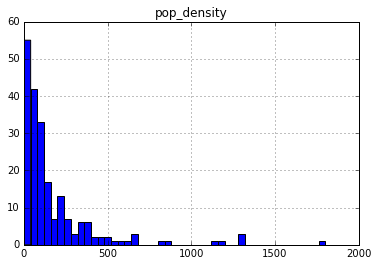

In [104]:
df.hist('pop_density', bins=50, range=[0,2000])

In [105]:
df['area_ratio'] = df['area_water'] / df['area_land']

In [112]:
df[['name','area_ratio']].sort_values(
    by='area_ratio',ascending=False).head()

,name,area_ratio
246,Virgin Islands,4.520231
245,Puerto Rico,0.554791
11,"Bahamas, The",0.386613
70,Guinea-Bissau,0.284673
105,Malawi,0.259396


End of exercise